In [1]:
# Блок основных библиотек
import pandas as pd
import numpy as np
import math 

# Блокграфических пакетов
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm

import matplotlib.image as mpimg # библиотека чтения изображений

import seaborn as sns
import plotly
from plotly.subplots import make_subplots
from scipy.interpolate import make_interp_spline
from scipy.interpolate import interp1d
import pylab
%matplotlib inline
sns.set_style('darkgrid')

# Блок библиотеки sklearn
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error # метрика для проверки 
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score, cross_val_predict

from sklearn import linear_model
from sklearn.svm import SVR # метод опорных векторов
from sklearn.linear_model import LinearRegression   # линейная регрессия
from sklearn.neighbors import KNeighborsRegressor  # метод ближайших соседей 
from sklearn.ensemble import RandomForestRegressor # случайный лес
from sklearn.neural_network import MLPRegressor # многослойный персепртрон, нейросеть с учителем 
import statsmodels.api as sm 

# Блок исключеия вывода предупреждающих ошибок
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.filterwarnings("ignore")

# np.random.seed(42) # чтобы выборки данных всегда были одни и те же - берем любую цифру мне нравится 42)

In [3]:
data_Train_ML = pd.read_csv(r'data_storage\data_block2_corr\data_Train_ML.csv')

In [4]:
data_Test_ML = pd.read_csv(r'data_storage\data_block2_corr\data_Test_ML.csv')

In [5]:
data_Train_ML.describe().T

,count,mean,std,min,25%,50%,75%,max
pattern_angle,200.0,0.505000,0.501230,0.000000,0.000000,1.000000,1.000000,1.000000
step_strip,200.0,7.026589,2.169412,1.525230,5.519591,7.031957,8.288326,12.678927
density_strip,200.0,56.812242,11.102082,31.804142,49.244229,56.861518,63.676563,84.310770
ratio_filler_matrix,200.0,2.970017,0.906174,0.596783,2.344010,2.894289,3.647081,5.295842
density,200.0,1981.942511,70.605937,1801.940700,1934.969850,1978.069700,2022.651750,2160.751500
elasticity_module,200.0,790.986054,311.236154,60.474888,570.088223,814.960845,1021.213350,1615.096900
number_hardeners,200.0,109.180384,25.754899,47.233414,90.363547,109.323345,126.774040,170.332570
content_epoxy_groups,200.0,22.307112,2.403920,16.048979,20.620342,22.363540,24.008937,28.955095
flash_temperature,200.0,285.273407,38.330166,198.172640,259.224575,285.853960,309.306460,385.894780
surface_density,200.0,475.146115,280.837422,6.779255,245.157882,446.525425,680.963520,1165.544400


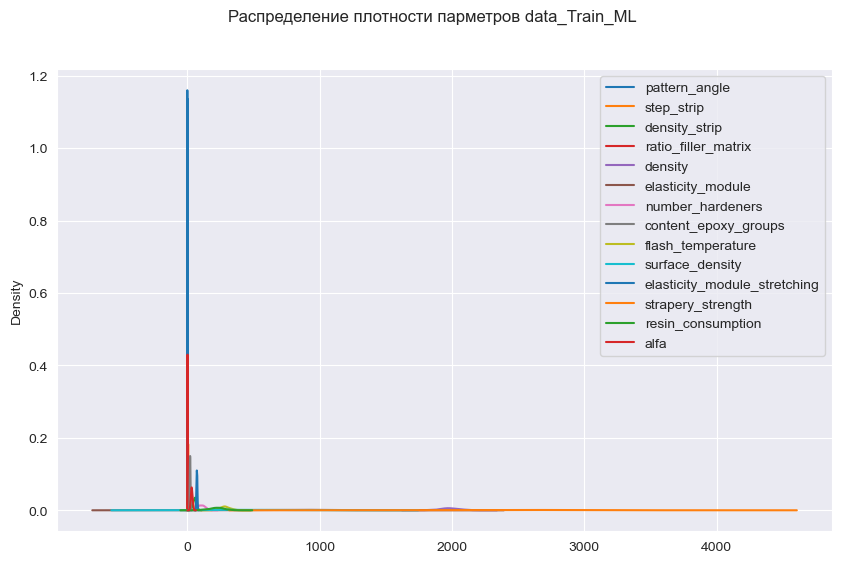

In [6]:
# Оценка плотности ядра data_Train_ML
analysis_core_density(data_Train_ML, 10,  6, 
                      'Распределение плотности парметров data_Train_ML', 
                      r'save_fig\fig_block3_regress\analysis_core_density_data_Train_ML.png'
                      )

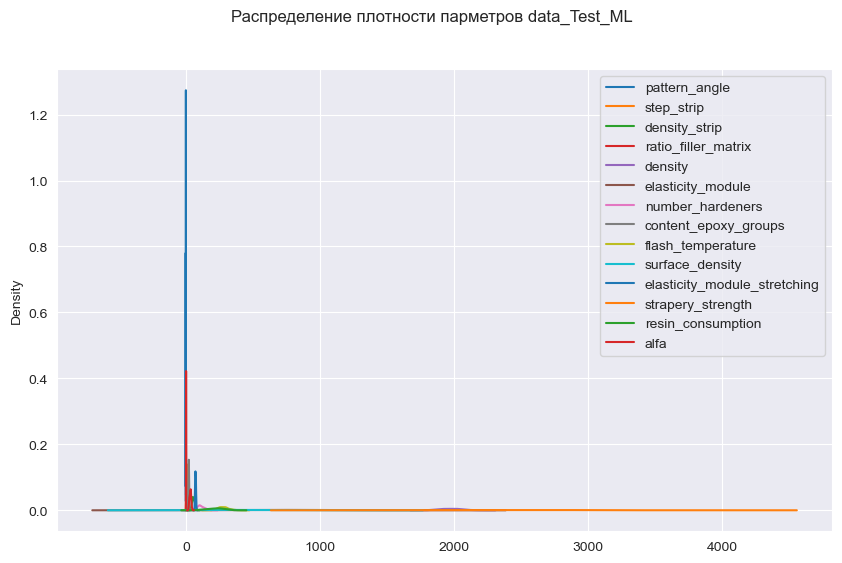

In [7]:
# Оценка плотности ядра data_Test_ML
analysis_core_density(data_Test_ML, 10, 6, 
                      'Распределение плотности парметров data_Test_ML', 
                      r'save_fig\fig_block3_regress\analysis_core_density_data_Test_ML.png'
                      )

Графики плотности ядра показывают, что наши данные находятся в разных диапазонах, 
что требует нормализации данных.
Нормализуем  наш dataset - data_Train_ML и data_Test_ML  по методу MinMaxskaler

In [ ]:
# Нормализация data_Train_ML 

In [5]:
# список наших столбцов
list_data = list(data_Train_ML)

In [6]:
scaler = MinMaxScaler() # вызываем метод MinMaxskaler

In [7]:
#  обучаем MinMaxScaler() -передаем только числовые значения столбцов, указанных списком list_data или можно перечислить какие нужны
data_Train_ML_norm = scaler.fit_transform(data_Train_ML)                                                     

In [8]:
# создадим новый df с нормализованными данными с названием наших столбцов 
data_Train_norm = pd.DataFrame(data = data_Train_ML_norm, columns = list_data)

In [12]:
data_Train_norm.describe().T

,count,mean,std,min,25%,50%,75%,max
pattern_angle,200.0,0.505000,0.501230,0.0,0.000000,1.000000,1.000000,1.0
step_strip,200.0,0.493232,0.194502,0.0,0.358120,0.493713,0.606355,1.0
density_strip,200.0,0.476285,0.211442,0.0,0.332150,0.477223,0.607017,1.0
ratio_filler_matrix,200.0,0.505045,0.192842,0.0,0.371825,0.488929,0.649130,1.0
density,200.0,0.501662,0.196778,0.0,0.370750,0.490869,0.615118,1.0
elasticity_module,200.0,0.469896,0.200201,0.0,0.327805,0.485318,0.617988,1.0
number_hardeners,200.0,0.503228,0.209221,0.0,0.350369,0.504390,0.646151,1.0
content_epoxy_groups,200.0,0.484897,0.186262,0.0,0.354201,0.489269,0.616759,1.0
flash_temperature,200.0,0.463988,0.204186,0.0,0.325225,0.467080,0.592012,1.0
surface_density,200.0,0.404195,0.242359,0.0,0.205718,0.379496,0.581813,1.0


In [ ]:
# Нормализация data_Test_ML 

In [9]:
scaler_Test = MinMaxScaler()

In [10]:
list_data = list(data_Test_ML)

In [11]:
data_Test_ML_norm = scaler_Test.fit_transform(data_Test_ML)                                                        

In [12]:
data_Test_norm = pd.DataFrame(data = data_Test_ML_norm, columns = list_data)

In [19]:
data_Test_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   pattern_angle                 100 non-null    float64
 1   step_strip                    100 non-null    float64
 2   density_strip                 100 non-null    float64
 3   ratio_filler_matrix           100 non-null    float64
 4   density                       100 non-null    float64
 5   elasticity_module             100 non-null    float64
 6   number_hardeners              100 non-null    float64
 7   content_epoxy_groups          100 non-null    float64
 8   flash_temperature             100 non-null    float64
 9   surface_density               100 non-null    float64
 10  elasticity_module_stretching  100 non-null    float64
 11  strapery_strength             100 non-null    float64
 12  resin_consumption             100 non-null    float64
 13  alfa  

In [20]:
data_Test_norm.describe().T

,count,mean,std,min,25%,50%,75%,max
pattern_angle,100.0,0.620000,0.487832,0.0,0.000000,1.000000,1.000000,1.0
step_strip,100.0,0.501967,0.226536,0.0,0.332939,0.505245,0.651636,1.0
density_strip,100.0,0.475676,0.206934,0.0,0.336336,0.440971,0.635870,1.0
ratio_filler_matrix,100.0,0.452954,0.219369,0.0,0.308450,0.424175,0.579885,1.0
density,100.0,0.442782,0.234460,0.0,0.259006,0.430237,0.611334,1.0
elasticity_module,100.0,0.423522,0.213840,0.0,0.264719,0.429518,0.564759,1.0
number_hardeners,100.0,0.504714,0.211781,0.0,0.378722,0.475298,0.642459,1.0
content_epoxy_groups,100.0,0.553162,0.231097,0.0,0.385347,0.552392,0.725036,1.0
flash_temperature,100.0,0.408570,0.209251,0.0,0.241501,0.401055,0.531230,1.0
surface_density,100.0,0.386516,0.253842,0.0,0.176218,0.353130,0.593168,1.0


In [ ]:
# После проведения операций над df все параметры становятся float64. Нам нужно перевести их в float32

In [13]:
# Вызываем функцию optimize_memory_usage из директории modules_def
# для уменьшения размерности переменных в файле data_main и облегчения расчетов  

data_Train_norm = optimize_memory_usage(data_Train_norm, print_size=True, 
                                        print_info_befor=False, print_info_after=True)

Memory usage size: before 0.0215 Mb - after 0.0108 Mb (49.7%).
--------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   pattern_angle                 200 non-null    float32
 1   step_strip                    200 non-null    float32
 2   density_strip                 200 non-null    float32
 3   ratio_filler_matrix           200 non-null    float32
 4   density                       200 non-null    float32
 5   elasticity_module             200 non-null    float32
 6   number_hardeners              200 non-null    float32
 7   content_epoxy_groups          200 non-null    float32
 8   flash_temperature             200 non-null    float32
 9   surface_density               200 non-null    float32
 10  elasticity_module_stretching  200 non-

In [14]:
data_Test_norm = optimize_memory_usage(data_Test_norm, print_size=True, 
                                        print_info_befor=False, print_info_after=True)

Memory usage size: before 0.0108 Mb - after 0.0055 Mb (49.4%).
--------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   pattern_angle                 100 non-null    float32
 1   step_strip                    100 non-null    float32
 2   density_strip                 100 non-null    float32
 3   ratio_filler_matrix           100 non-null    float32
 4   density                       100 non-null    float32
 5   elasticity_module             100 non-null    float32
 6   number_hardeners              100 non-null    float32
 7   content_epoxy_groups          100 non-null    float32
 8   flash_temperature             100 non-null    float32
 9   surface_density               100 non-null    float32
 10  elasticity_module_stretching  100 non-n

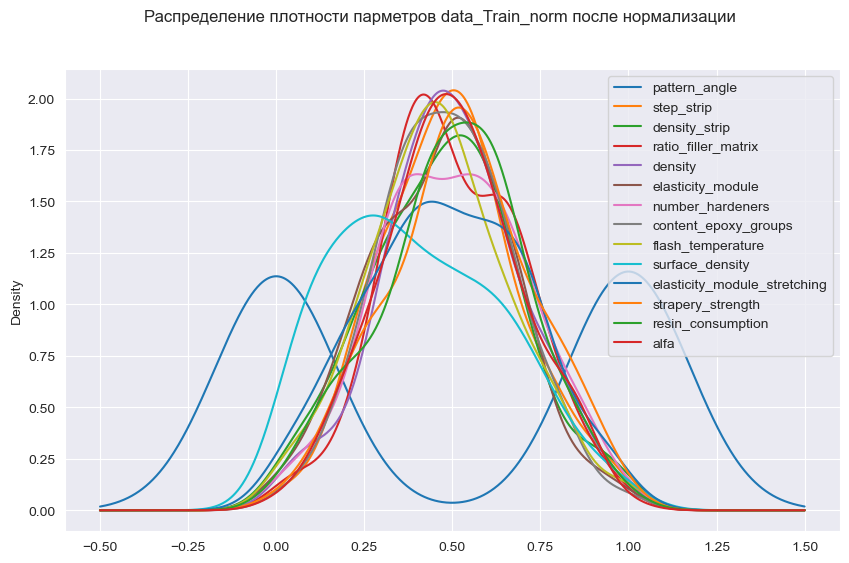

In [15]:
# Оценка плотности ядра  data_Train_norm после нормализации
analysis_core_density(data_Train_norm, 10,  6, 
                      'Распределение плотности парметров data_Train_norm после нормализации', 
                      r'save_fig\fig_block3_regress\analysis_core_density_data_Train_norm.png'
                      )

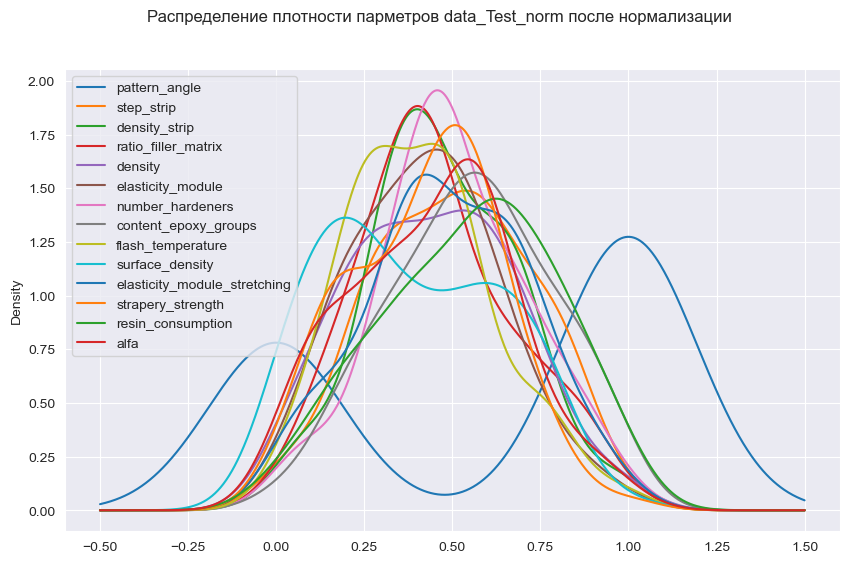

In [16]:
# Оценка плотности ядра  data_Test_norm после нормализации
analysis_core_density(data_Test_norm, 10,  6, 
                      'Распределение плотности парметров data_Test_norm после нормализации', 
                      r'save_fig\fig_block3_regress\analysis_core_density_data_Test_norm.png'
                      )

# Выбор признаков (фич) для регрессионного анализа

Учитывая наши исследования в Блоке Корреляции возьмем для исследования
в Анализ регрессии только те парамтеры, которые показали хотя бы слабую корреляцию для наших целевых показателей: 'elasticity_module_stretching' и 'strapery_strength'

In [ ]:
# 1. Собираем датасет для целевой переменной 'elasticity_module_stretching' (_EMS)

Как мы выяснили в Блоке 2, можно проводить регрессивный анализ по целевой переменной  'elasticity_module_stretching' с параметрами: 'elasticity_module',  'content_epoxy_groups',  'alfa' 

In [ ]:
# Train для- _EMS

In [17]:
data_Train_EMS = data_Train_norm.copy() 

In [18]:
y_Train_EMS = data_Train_EMS[["elasticity_module_stretching"]]

In [19]:
X_Train_EMS = data_Train_EMS.drop(columns=['pattern_angle', 'step_strip', 'density_strip', 
                                           'ratio_filler_matrix', 'density','number_hardeners',
                                           'flash_temperature', 'surface_density',
                                           'elasticity_module_stretching', 'resin_consumption'])

In [30]:
X_Train_EMS.shape

(200, 4)

In [31]:
# Test - для _EMS

In [20]:
data_Test_EMS = data_Test_norm.copy()

In [21]:
y_Test_EMS = data_Test_EMS[["elasticity_module_stretching"]]

In [22]:
X_Test_EMS = data_Test_EMS.drop(columns=['pattern_angle', 'step_strip', 'density_strip', 
                                           'ratio_filler_matrix', 'density','number_hardeners',
                                           'flash_temperature', 'surface_density',
                                           'elasticity_module_stretching', 'resin_consumption'])

In [23]:
X_Test_EMS.shape

(100, 4)

In [ ]:
# 2.  Собираем датасет для целевой переменной 'strapery_strength' (_SS)

Как мы выяснили в Блоке 2, можно проводить регрессивный анализ по целевой переменной  'strapery_strength'
с параметрами: 'ratio_filler_matrix', 'elasticity_module', 'alfa'

In [ ]:
# Train для- _SS

In [24]:
data_Train_SS = data_Train_norm.copy() 

In [25]:
y_Train_SS = data_Train_SS[['strapery_strength']]

In [26]:
X_Train_SS = data_Train_SS.drop(columns=['pattern_angle', 'step_strip', 'density_strip', 
                                         'density', 'number_hardeners','content_epoxy_groups',
                                         'flash_temperature','surface_density',
                                         'elasticity_module_stretching', 'strapery_strength',
                                         'resin_consumption'])                             

In [41]:
X_Train_SS.shape

(200, 3)

In [ ]:
# Test - для _EMS

In [27]:
data_Test_SS = data_Test_norm.copy() 

In [28]:
y_Test_SS = data_Test_SS[['strapery_strength']]

In [29]:
X_Test_SS = data_Test_SS.drop(columns=['pattern_angle', 'step_strip', 'density_strip', 
                                       'density', 'number_hardeners','content_epoxy_groups',
                                       'flash_temperature','surface_density',
                                       'elasticity_module_stretching', 'strapery_strength',
                                       'resin_consumption']) 

In [45]:
X_Test_SS.shape

(100, 3)

In [ ]:
# Гипотеза: между X и y должна быть линейная зависимость

Проведем исследование и расчеты для наших целевых переменных следующими инструментами:
0. lr   = LinearRegression() - линейня регрессия
1. knr  = KNeighborsRegressor() - метод ближайших соседей
2. rfr  = RandomForestRegressor() - случайный лес
3. svr  = SVR() - метод опорных векторов
4. mlpr = MLPRegressor()- многослойный перцептрон - обучение с 'учителем'
5. smlr = sm.OLS() - statsmodels.regression.linear_model.OLS()статистическая линейная регрессия - регрессиz методом наименьших квадратов

В итоге сравним полученные результаты по расчетным парамтерам:
- MAPE   - Cредняя абсолютная процентная ошибка средняя разница между прогнозируемым значением и фактическим значением              составляет ____%
- MAE    - mean_absolute_error()  Cредняя абсолютная ошибка Чем ниже MAE для данной модели, тем точнее модель способна              предсказать фактические значения
- MSE    - mean_squared_error() Среднеквадратическая ошибка
- MaxER  - max_error() Максимальная ошибка
- RMSE   - среднеквадратическая ошибка
- R2     - коэффициент детерминации - функция оценки регрессии
- SCORES - оценка кросс-валидации
- MCVS   - Среднее значение оценки кросс-валидации
- StdDS  - Статистическая ошибка оценки кросс-валидации

# Важно!!!!! Остановка иттераций
Следите за оценкой после каждого цикла, и когда ее очередное изменение меньше некоторого граничного значения — скажем, 0.001 — останавливайтесь.
Используйте проверочный датасет (validation set) и отслеживайте число ошибок, например, с помощью MSE. Когда метрика перестанет уменьшаться, остановитесь.

In [ ]:
# !!!! Вывод - Чем больше значение R-квадрата, тем точнее переменные-предикторы способны
# предсказать значение переменной отклика.

Значение R-квадрата может варьироваться от 0 до 1, где:

0 указывает, что переменная отклика вообще не может быть объяснена предикторной переменной.
1 указывает, что переменная отклика может быть полностью объяснена без ошибок предикторными переменными.

Мера того, насколько хорошо модель линейной регрессии «соответствует» набору данных. 
Также обычно называемый коэффициентом детерминации,
R-квадрат представляет собой долю дисперсии в переменной отклика, которая может быть объяснена предикторной переменной
предпочтительны модели с более высокими значениями R-квадрата, поскольку это означает,
что набор переменных-предикторов в модели способен хорошо объяснить изменение переменной отклика.

In [ ]:
# !!!!!! https://www.codecamp.ru/blog/linear-regression-python/
# интерпретация результатов statsmodels.regression.linear_model.olsun
Остатки (remains) - это то же самое, что и ошибка, т.е. отклонение предсказания от истинного значения. 

F-statistic - критерий Фишера проверки гипотезы о равенстве дисперсий. 
В данном случае сравнивается модель с нулевыми параметрами (кроме интерсепта) с текущей

Prob. (F-statistic) - вероятность того, что коэффициенты при всех переменных равны нулю

Log-likelihood - насколько хорошо данные описываются моделью.

AIC BIC ак критерий для отбора модели, который определяет на сколько сильно модель переобучена. 
Чем меньше значение - тем лучше модель.

Р>|т|. Отдельные p-значения говорят нам, является ли каждая 
предикторная переменная статистически значимой. 

Intercept - все переменные обнуляются и подбирается константа, наилучшим образом описывающая данные.Значение У при Х=0

std err - дисперсия коэффициента по точкам данных.

t - статистика t-Стьюдента, чем больше — тем лучше измерен коэффициент 
(чем меньше стандартное отклонение, тем лучше коэффициент описывает зависимость).
Обычно t-критерий позволяет нам оценить важность различных предикторов, предполагая, 
что остатки модели нормально распределены около нуля. Если остатки не ведут себя таким образом, 
то это говорит о наличии некоторой нелинейности между переменными и о том, 
что их t-тесты не следует использовать для оценки важности отдельных предикторов.

In [ ]:
# _________________

In [30]:
# df_models массив названий моделей регрессии
df_models = pd.DataFrame(columns=['model_lr', 'model_knr', 'model_rfr', 'model_svr', 'model_mlpr']) 

In [31]:
# Создаем df для записи результатов параметров работы моделей регрессии для целевых параметров
df_error_calc_EMS = pd.DataFrame(columns=['Model','R2','MAE','MSE','MaxER','RMSE','MCVS','StdDS']) #'Target',
df_error_calc_SS  = pd.DataFrame(columns=['Model','R2','MAE','MSE','MaxER','RMSE','MCVS','StdDS']) #'Target',

In [32]:
# Значения для Регрессионного анализа
# Типы рассматриваемых видов регрессии
model_lr = LinearRegression()
model_knr = KNeighborsRegressor()
model_rfr = RandomForestRegressor()
model_svr = SVR()
model_mlpr = MLPRegressor()
# Переменные для рассчетов
index_err_EMS = 0 # счетчик для 'elasticity_module_stretching'
index_err_SS = 0 # счетчик для strapery_strength'
cv_err = 5 # количсетво интервалов при расчете скросс-валидации
param_EMS = 'elasticity_module_stretching'
param_SS  = 'strapery_strength'

0. lr   = LinearRegression() - линейня регрессия
1. knr  = KNeighborsRegressor() - метод ближайших соседей
2. rfr  = RandomForestRegressor() - случайный лес
3. svr  = SVR() - метод опорных векторов
4. mlpr = MLPRegressor()- многослойный перцептрон - обучение с 'учителем'
5. smlr = sm.OLS() - statsmodels.regression.linear_model.OLS()статистическая линейная регрессия - регрессиz методом наименьших квадратов

In [33]:
df_models

,model_lr,model_knr,model_rfr,model_svr,model_mlpr


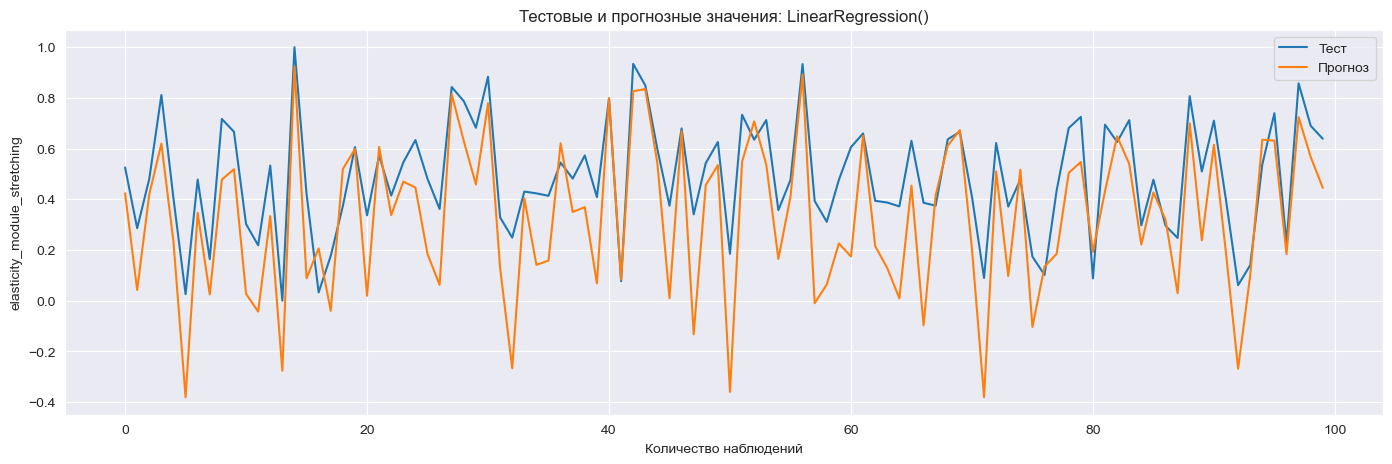

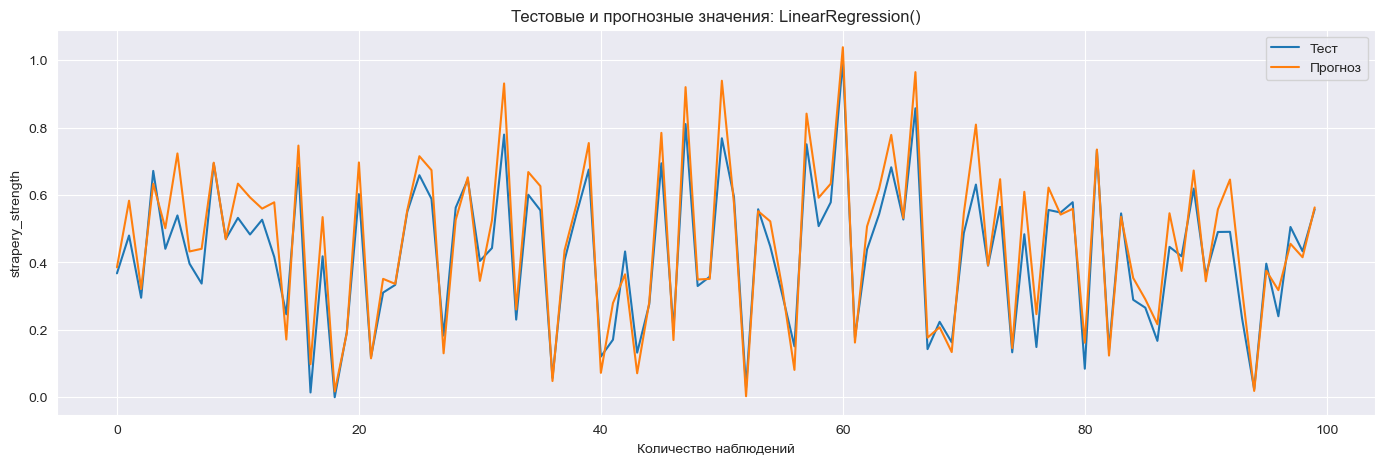

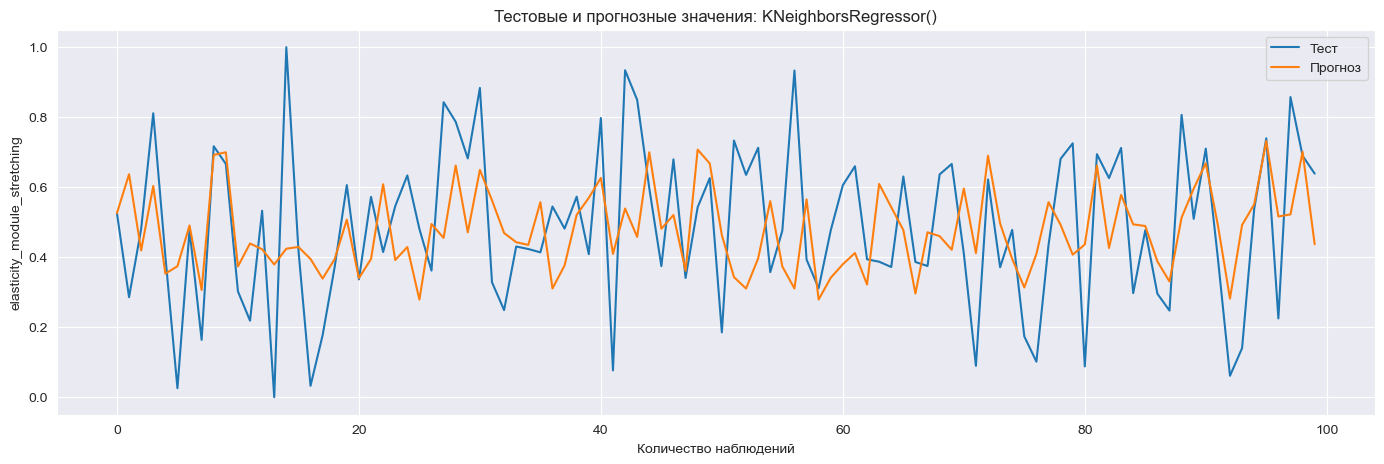

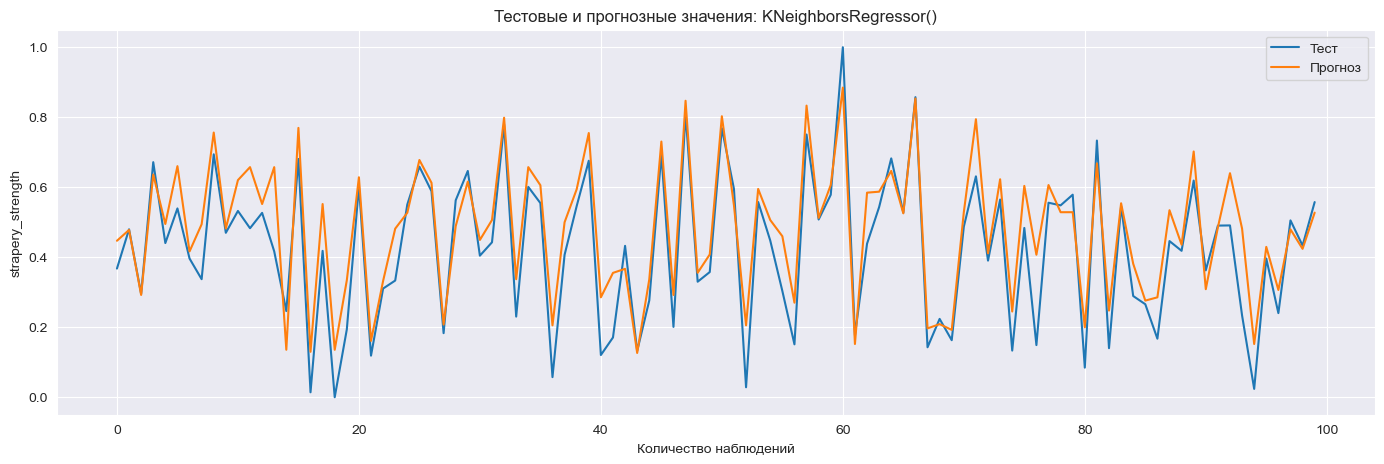

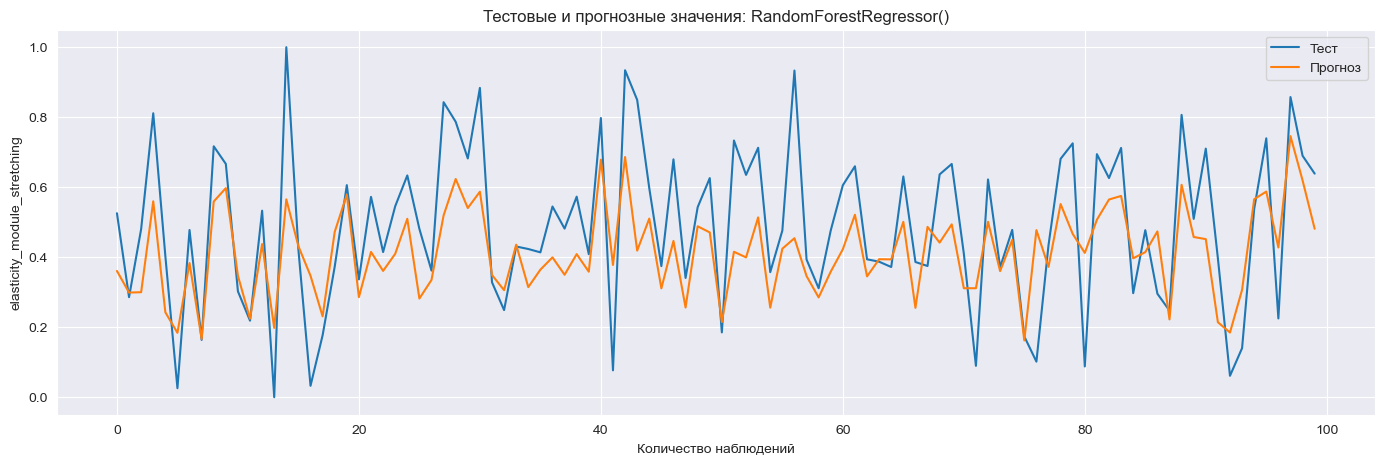

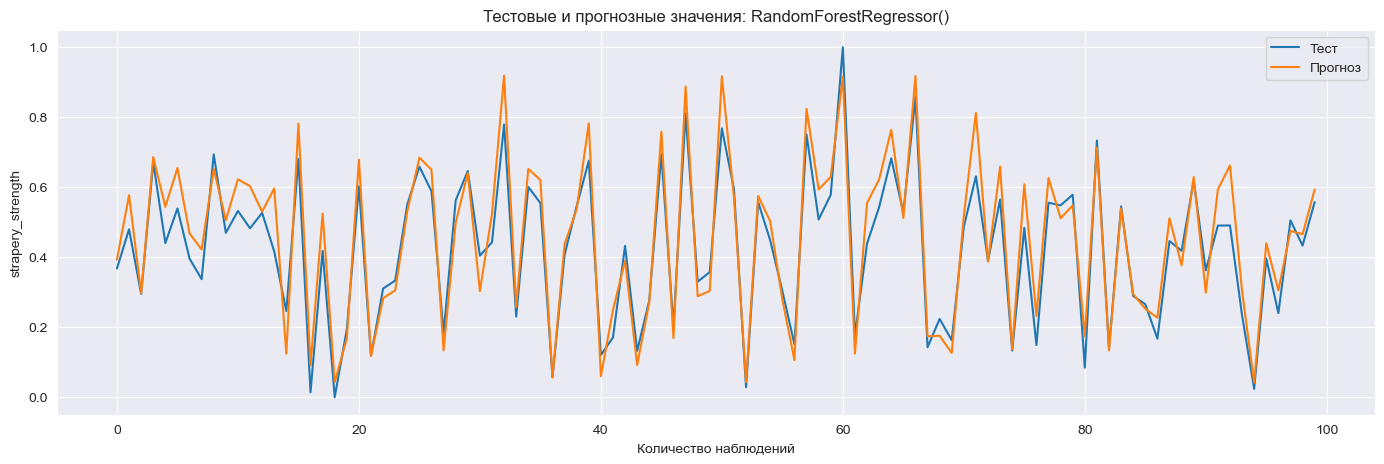

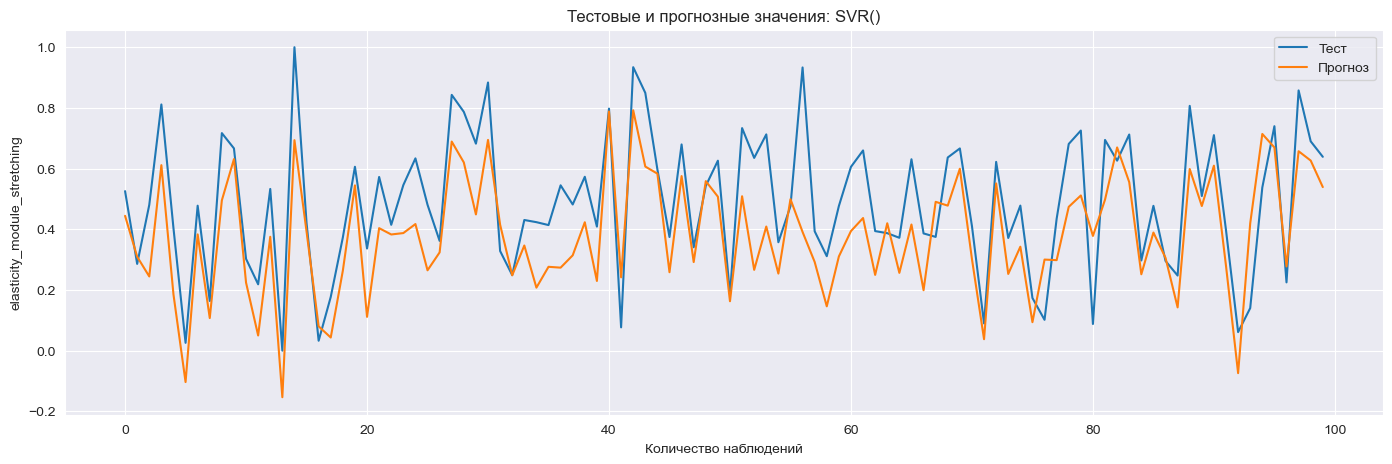

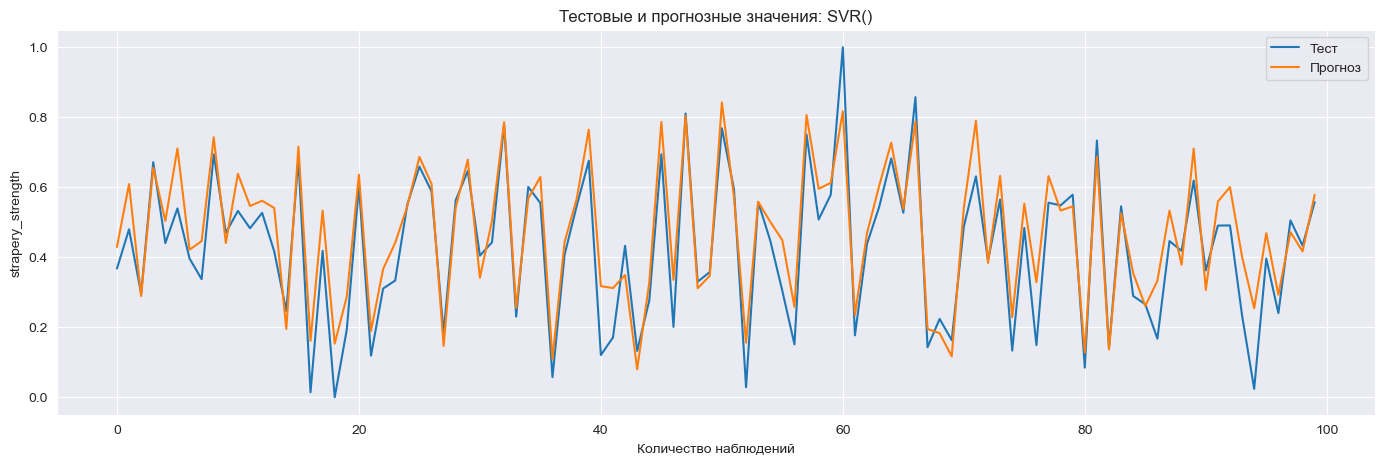

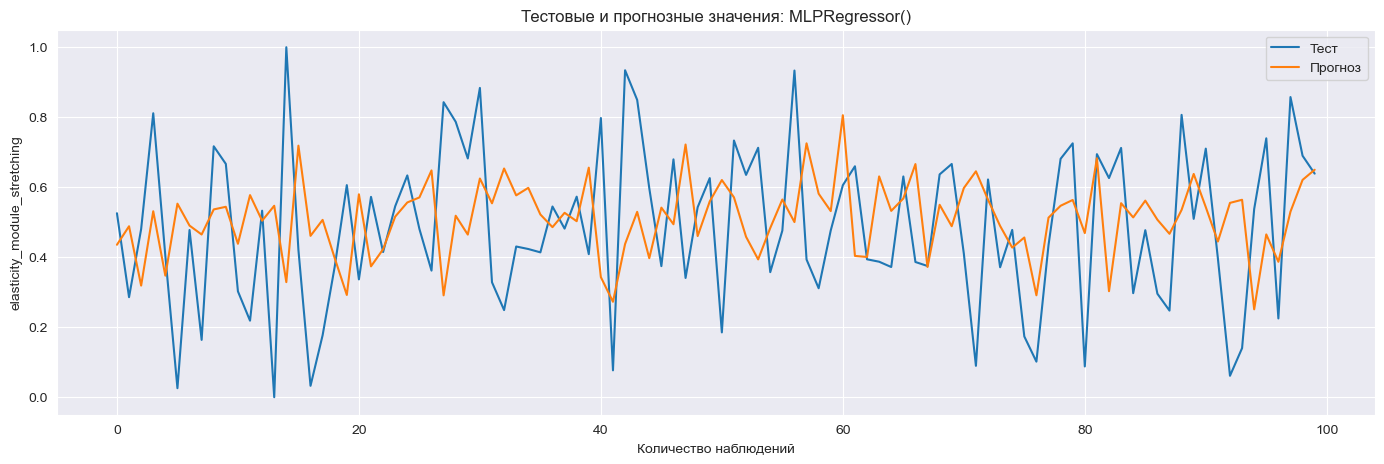

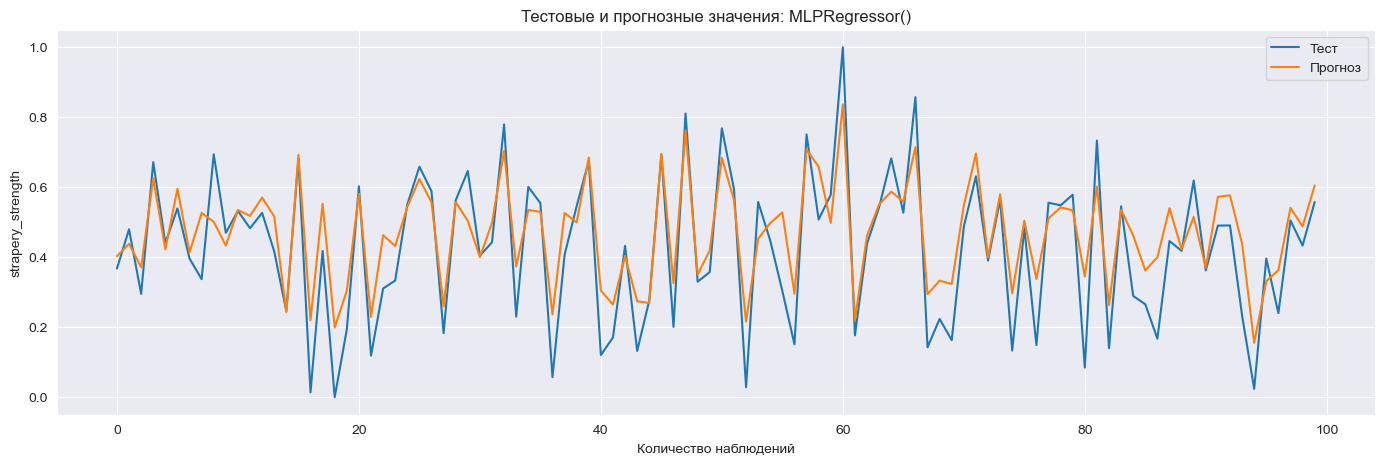

In [34]:
for column in df_models.columns:
    
    if column == 'model_lr': # линейня регрессия
        model_name = model_lr
        model_creation(df_error_calc_EMS, model_name, column, param_EMS, 
                       X_Train_EMS, y_Train_EMS, X_Test_EMS , y_Test_EMS, 
                       cv_err, index_err_EMS)
        plt.savefig(r'save_fig\fig_block3_regress\test_predict_model_lr_ENS.png', dpi=100) # Сохраняем рисунок таблицы в папку save_fig
        plt.show()
        index_err_EMS  = index_err_EMS  + 1
        model_creation(df_error_calc_SS, model_name, column, param_SS, 
                       X_Train_SS, y_Train_SS, X_Test_SS , y_Test_SS, 
                       cv_err, index_err_SS)
        plt.savefig(r'save_fig\fig_block3_regress\test_predict_model_lr_SS.png', dpi=100)
        plt.show()
        index_err_SS  = index_err_SS  + 1

    elif column == 'model_knr': # метод ближайших соседей
        model_name = model_knr
        model_creation(df_error_calc_EMS, model_name, column, param_EMS, 
                       X_Train_EMS, y_Train_EMS, X_Test_EMS , y_Test_EMS, 
                       cv_err, index_err_EMS)
        plt.savefig(r'save_fig\fig_block3_regress\test_predict_model__knr_ENS.png', dpi=100) # Сохраняем рисунок таблицы в папку save_fig
        plt.show()
        index_err_EMS  = index_err_EMS  + 1
        model_creation(df_error_calc_SS, model_name, column, param_SS, 
                       X_Train_SS, y_Train_SS, X_Test_SS , y_Test_SS, 
                       cv_err, index_err_SS)
        plt.savefig(r'save_fig\fig_block3_regress\test_predict_model__knr_SS.png', dpi=100) 
        plt.show()
        index_err_SS  = index_err_SS  + 1
        
    elif column == 'model_rfr': # случайный лес
        model_name = model_rfr
        model_creation(df_error_calc_EMS, model_name, column, param_EMS, 
                       X_Train_EMS, y_Train_EMS, X_Test_EMS , y_Test_EMS, 
                       cv_err, index_err_EMS)
        plt.savefig(r'save_fig\fig_block3_regress\test_predict_model__rfr_ENS.png', dpi=100)
        plt.show()
        index_err_EMS  = index_err_EMS  + 1
        model_creation(df_error_calc_SS, model_name, column, param_SS, 
                       X_Train_SS, y_Train_SS, X_Test_SS , y_Test_SS, 
                       cv_err, index_err_SS)
        plt.savefig(r'save_fig\fig_block3_regress\test_predict_model_rfr_SS.png', dpi=100) 
        plt.show()
        index_err_SS  = index_err_SS  + 1
        
    elif column == 'model_svr': # метод опорных векторов
        model_name = model_svr
        model_creation(df_error_calc_EMS, model_name, column, param_EMS, 
                       X_Train_EMS, y_Train_EMS, X_Test_EMS , y_Test_EMS, 
                       cv_err, index_err_EMS)
        plt.savefig(r'save_fig\fig_block3_regress\test_predict_model_svr_ENS.png', dpi=100)
        plt.show()
        index_err_EMS  = index_err_EMS  + 1
        model_creation(df_error_calc_SS, model_name, column, param_SS, 
                       X_Train_SS, y_Train_SS, X_Test_SS , y_Test_SS, 
                       cv_err, index_err_SS)
        plt.savefig(r'save_fig\fig_block3_regress\test_predict_model_svr_SS.png', dpi=100)
        plt.show()
        index_err_SS  = index_err_SS  + 1
        
    elif column == 'model_mlpr': # метод могослойный парсептрон
        model_name = model_mlpr
        model_creation(df_error_calc_EMS, model_name, column, param_EMS, 
                       X_Train_EMS, y_Train_EMS, X_Test_EMS , y_Test_EMS, 
                       cv_err, index_err_EMS)
        plt.savefig(r'save_fig\fig_block3_regress\test_predict_model_mlpr_ENS.png', dpi=100)
        plt.show()
        index_err_EMS  = index_err_EMS  + 1
        model_creation(df_error_calc_SS, model_name, column, param_SS, 
                       X_Train_SS, y_Train_SS, X_Test_SS , y_Test_SS, 
                       cv_err, index_err_SS)
        plt.savefig(r'save_fig\fig_block3_regress\test_predict_model_mlpr_SS.png', dpi=100)
        plt.show()
        index_err_SS  = index_err_SS  + 1    

In [113]:
df_error_calc_EMS.to_csv(r'data_storage\data_block3_regress\df_error_calc_EMS.csv', index=False)

In [114]:
df_error_calc_SS.to_csv(r'data_storage\data_block3_regress\df_error_calc_SS.csv', index=False)

In [115]:
df_error_calc_EMS

,Model,R2,MAE,MSE,MaxER,RMSE,MCVS,StdDS
0,model_lr,0.081019,0.176958,0.047743,0.545018,0.218502,0.964145,0.011321
1,model_knr,0.102731,0.175163,0.046615,0.622712,0.215905,-0.329495,0.230327
2,model_rfr,0.414789,0.137203,0.030403,0.556622,0.273327,0.171641,0.196659
3,model_svr,0.479256,0.13892,0.027054,0.542192,0.318351,0.54259,0.142171
4,model_mlpr,-0.241245,0.210053,0.064485,0.574527,0.246567,-0.276121,0.326438


In [116]:
df_error_calc_SS

,Model,R2,MAE,MSE,MaxER,RMSE,MCVS,StdDS
0,model_lr,0.887107,0.055714,0.005047,0.183987,0.071044,0.932461,0.038684
1,model_knr,0.808478,0.072267,0.008563,0.258085,0.092534,0.868781,0.051964
2,model_rfr,0.889558,0.056954,0.004938,0.182986,0.317546,0.906841,0.05444
3,model_svr,0.843971,0.066948,0.006976,0.230442,0.292071,0.832279,0.059178
4,model_mlpr,0.776311,0.082132,0.010001,0.254392,0.268826,0.800397,0.136706


In [ ]:
# Линейная регрессия на основе статистических модулей (наиболее полный статистический анализ)

$y = w_0 + w_1x_1$

In [73]:
# Для X_Train_EMS
# Добавляем константу w0, так как в библиотеке sm она не предусмотрена
X_train_EMS_add = sm.add_constant(X_Train_EMS)
X_train_EMS_add.head()

,const,elasticity_module,content_epoxy_groups,strapery_strength,alfa
0,1.0,0.499041,0.804776,0.505717,0.429432
1,1.0,0.214517,0.434892,0.613572,0.598057
2,1.0,0.865363,0.447870,0.530728,0.485711
3,1.0,0.317213,0.649530,0.434655,0.467412
4,1.0,0.333198,0.578996,0.604220,0.533120


In [74]:
# OLS - ordinary least squares - метод наименьших квадратов
model_sm = sm.OLS(y_Train_EMS, X_train_EMS_add).fit()

In [75]:
model_sm.params

const                   0.579625
elasticity_module       0.014269
content_epoxy_groups   -0.008714
strapery_strength       4.538590
alfa                   -4.948430
dtype: float64

In [76]:
model_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     elasticity_module_stretching   R-squared:                       0.972
Model:                                      OLS   Adj. R-squared:                  0.971
Method:                           Least Squares   F-statistic:                     1692.
Date:                          Mon, 10 Apr 2023   Prob (F-statistic):          3.84e-150
Time:                                  19:25:36   Log-Likelihood:                 369.09
No. Observations:                           200   AIC:                            -728.2
Df Residuals:                               195   BIC:                            -711.7
Df Model:                                     4                                         
Covariance Type:                      nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.5796      0.012     47.981      0.000       0.556       0.603
elasticity_module        0.0143      0.014      1.022      0.308      -0.013       0.042
content_epoxy_groups    -0.0087      0.015     -0.582      0.561      -0.038       0.021
strapery_strength        4.5386      0.057     79.765      0.000       4.426       4.651
alfa                    -4.9484      0.061    -81.109      0.000      -5.069      -4.828
==============================================================================
Omnibus:                       14.786   Durbin-Watson:                   1.886
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               25.965
Skew:                           0.385   Prob(JB):                     2.30e-06
Kurtosis:                       4.589   Cond. No.                         42.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
# Для X_Train_SS
# Добавляем константу w0, так как в библиотеке sm она не предусмотрена
X_train_SS_add = sm.add_constant(X_Train_SS)
X_train_SS_add.head()

,const,ratio_filler_matrix,elasticity_module,alfa
0,1.0,0.268074,0.499041,0.429432
1,1.0,0.358804,0.214517,0.598057
2,1.0,0.149261,0.865363,0.485711
3,1.0,0.645906,0.317213,0.467412
4,1.0,0.713668,0.333198,0.533120


In [78]:
# OLS - ordinary least squares - метод наименьших квадратов
model_sm = sm.OLS(y_Train_SS, X_train_SS_add).fit()

In [79]:
model_sm.params

const                  0.011492
ratio_filler_matrix    0.001450
elasticity_module     -0.021967
alfa                   1.043117
dtype: float64

In [80]:
model_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      strapery_strength   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     1106.
Date:                Mon, 10 Apr 2023   Prob (F-statistic):          1.54e-122
Time:                        19:25:51   Log-Likelihood:                 321.08
No. Observations:                 200   AIC:                            -634.2
Df Residuals:                     196   BIC:                            -621.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0115      0.014      0.804      0.422      -0.017       0.040
ratio_filler_matrix     0.0014      0.018      0.080      0.936      -0.034       0.037
elasticity_module      -0.0220      0.018     -1.249      0.213      -0.057       0.013
alfa                    1.0431      0.018     56.989      0.000       1.007       1.079
==============================================================================
Omnibus:                        2.866   Durbin-Watson:                   1.841
Prob(Omnibus):                  0.239   Jarque-Bera (JB):                2.034
Skew:                           0.025   Prob(JB):                        0.362
Kurtosis:                       2.508   Cond. No.                         8.22
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [146]:
# Блок импорта созданых функций для проекта из папки modules_def
%run ./modules_def/optimize_memory_usage.ipynb # функция оптимизации размера df
%run ./modules_def/drawing_graphs.ipynb        # функция рисования разных графиков 
%run ./modules_def/sns_plt_PairGrid.ipynb      # функция рисования матрицы графиков
%run ./modules_def/plot_corr_heatmap.ipynb     # функция рисования корреляционной матрицы df
%run ./modules_def/analysis_core_density.ipynb # функция графического анализа плотности ядра df
%run ./modules_def/model_creation.ipynb        # функция расчета основные оценочные показатели типа регрессии

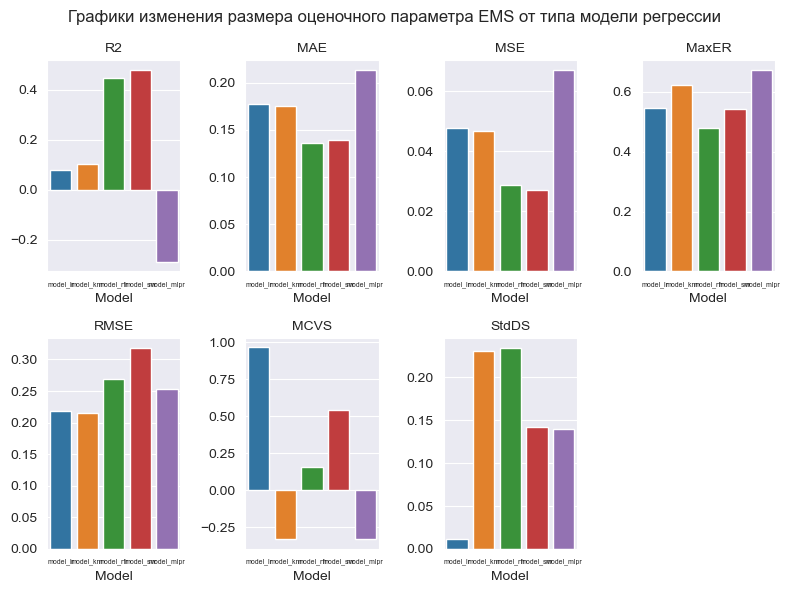

In [149]:
# Построим Графики изменения размера оценочного параметра от типа модели регрессии для целевого пареметра EMS
drawing_graphs(df_error_calc_EMS, 2, 4, 8, 6, None, 'barplot', 
               'Графики изменения размера оценочного параметра EMS от типа модели регрессии', 
               graf_name_path = r'save_fig\fig_block3_regress\graf_barplot_error_calc_EMS.png')

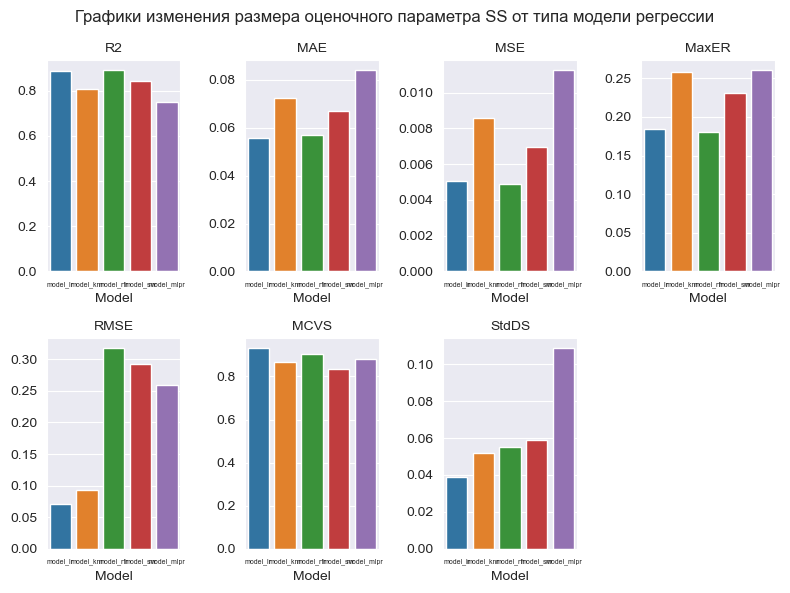

In [151]:
# Построим Графики изменения размера оценочного параметра от типа модели регрессии для целевого пареметра SS
drawing_graphs(df_error_calc_SS, 2, 4, 8, 6, None, 'barplot', 
               'Графики изменения размера оценочного параметра SS от типа модели регрессии', 
               graf_name_path = r'save_fig\fig_block3_regress\graf_barplot_error_calc_SS.png')

In [ ]:
# Конец блока № 3 Исследование регрессионных моделей для 2-х целевых перменных
# Созданы полученные в результате расчетов 2-а df с 7-ю показателями оценочных парметров  по 2-м целевым переменным 
# df_error_calc_EMS и df_error_calc_SS